In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

In [2]:
def read_xyz(path: str):
    df = pd.read_csv(path)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2 + df.z ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df

def read_all(load_dir: str, reader):
    paths = glob(f'{load_dir}/*.csv')
    return [reader(path) for path in paths]

In [27]:
c_direct_neighbours = read_all("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/c-3d-direct-neighbours", read_xyz)
c_off_axis_neighbours = read_all("/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/c-3d-off-axis-neighbours", read_xyz)

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

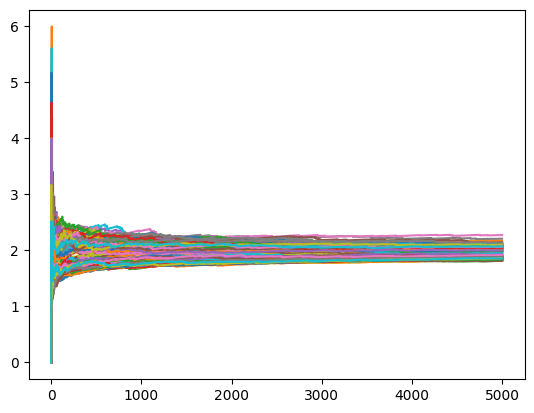

In [28]:
for c in c_direct_neighbours:
    plt.plot(c.fd)

for c in c_off_axis_neighbours:
    plt.plot(c.fd)

plt.show()

In [22]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(series))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    raise Exception("No convergence found")

def compute_fd(df, tol=0.05):
    tail_index = convergent_tail_index(df.fd, tol)
    return np.mean(df.fd[tail_index:]), np.std(df.fd[tail_index:])

In [29]:
aa = [compute_fd(c) for c in c_direct_neighbours]
bb = [compute_fd(c) for c in c_off_axis_neighbours]

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


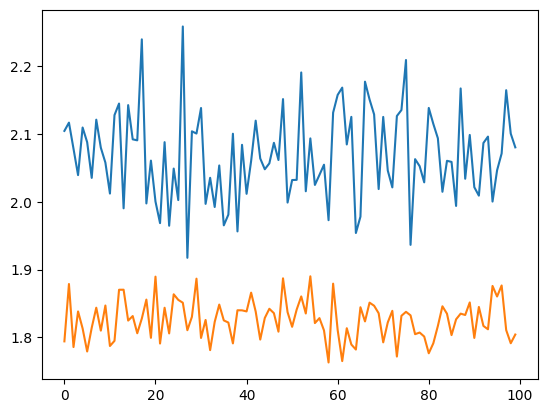

In [30]:
plt.plot(list(list(zip(*aa))[0]))
plt.plot(list(list(zip(*bb))[0]))
plt.show()

In [21]:
len(bb)

100

In [ ]:
read_